In [5]:
import textwrap as tw
import numpy as np
#black hole params
a=0.95 #BH spin param
M=1 #BH mass param
s=2*M #BH schwartzchild radius
r_h=(s+np.sqrt(s**2-4*a**2))/2
r_hi=(s-np.sqrt(s**2-4*a**2))/2

#test particle
m=0 #particle mass
L=-3 #particle angular momentum
E=5#particle total energy
r_0=5 #initial radial pos
r_0_prime=-0.01 #initial radial velocity
phi_0=0 #initial angular pos

mdlSummary=tw.dedent(f"""
Black Hole Parameters:\n
a={a} (Rotation Value)
M={M} (Mass)\n
r_h={r_h} (Outer Horizon radius)
r_hi={r_hi} (Inner Horizon radius)

Particle Parameters:\n
m={m} (Particle mass)
L={L} (Angular Momentum)
E={E} (Total Energy)
r_0={r_0} (radial position at t=0)
r_0_prime={r_0_prime} (radial velocity at t=0)

phi_0={phi_0} (angular pos at t=0)\n""")
print(mdlSummary)

#define functions we will need 
def Delta(r):
    delta=r**2 + a**2-r*s
    return delta

def P(r):
    p=E*(r**2 + a**2) - a*L
    return p

def R(r):
    R=-Delta(r)*((L-a*E)**2+m**2)+P(r)**2
    return R




Black Hole Parameters:

a=0.95 (Rotation Value)
M=1 (Mass)

r_h=1.31224989991992 (Outer Horizon radius)
r_hi=0.6877501000800801 (Inner Horizon radius)

Particle Parameters:

m=0 (Particle mass)
L=-3 (Angular Momentum)
E=5 (Total Energy)
r_0=5 (radial position at t=0)
r_0_prime=-0.01 (radial velocity at t=0)

phi_0=0 (angular pos at t=0)


In [6]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

def EOM(t,y):
    #y = t,phi,r,r'
    lambd=t
    r=y[2]
    rprime=y[3]
    
    rsq_dt=-a*(a*E-L)+(r**2+a**2)/(Delta(r))*P(r)
    rsq_dphi=L-a*E+a/(Delta(r))*P(r)
    dr=rprime
    dr_prime=1/Delta(r)*(rprime*(s+rprime*(s-r)))+2*rprime/r
    
    dx=np.array([rsq_dt/(r**2),rsq_dphi/(r**2),dr,dr_prime])
    return dx

lambda0=0
y0=[0,phi_0,r_0,r_0_prime]

lambda_max=100000

#EOM(0,[0,0,2.2])
RK=scipy.integrate.RK45(EOM,lambda0,y0,lambda_max,max_step=0.1)


In [7]:
step_max=1000
x=np.zeros((step_max,4))
x[0,:]=y0
reachedstep=0

for lambstep in range(1,step_max):
    try:
        RK.step()   
        x[lambstep,:]=RK.y
        reachedstep=lambstep
    except RuntimeError:
        break
        
x_trunc=x[0:reachedstep,:] #x without the trailing zero rows

  

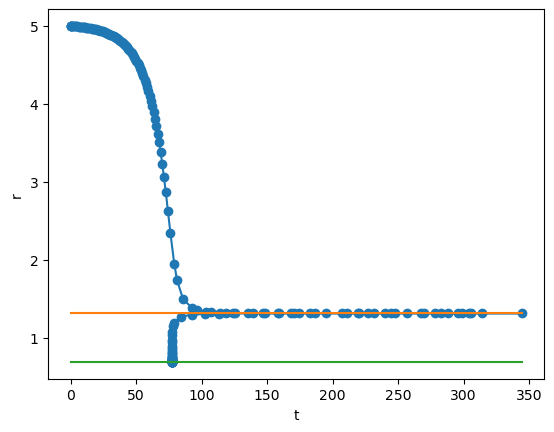

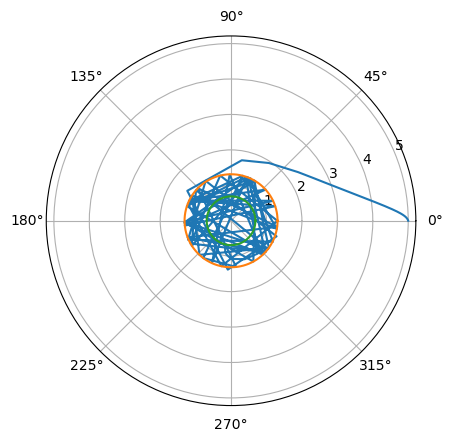

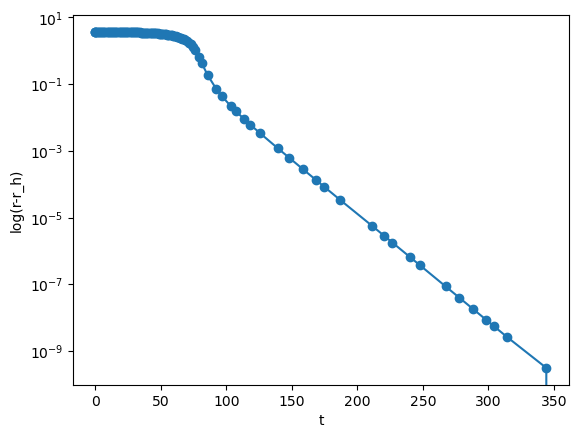

In [8]:
tmin=np.min(x_trunc[:,0])
tmax=np.max(x_trunc[:,0])

plt.plot(x_trunc[:,0],x_trunc[:,2],'-o')
plt.plot([tmin, tmax],[r_h,r_h])
plt.plot([tmin, tmax],[r_hi,r_hi])
plt.xlabel("t")
plt.ylabel("r")


#polar plot
fig2, ax2 = plt.subplots(subplot_kw={'projection':'polar'})

#setup horizon plotting
numpts=300
th_hor=np.linspace(0,2*np.pi,num=numpts)
ones_arr=np.ones((numpts))
rh_arr=ones_arr*r_h
rhi_arr=ones_arr*r_hi
#plot trajecory
ax2.plot(x_trunc[:,1],x_trunc[:,2])
#plot horizon
ax2.plot(th_hor,rh_arr)
ax2.plot(th_hor,rhi_arr)

plt.figure()
plt.semilogy(x_trunc[:,0],x_trunc[:,2]-r_h,'-o')
plt.xlabel("t")
plt.ylabel("log(r-r_h)");
